### 자기회귀 (AR, Autoregressive Model)
- 현시점의 자료는 p시점 전의 유한개의 과거 자료로 설명될 수 있다.
- 과거의 데이터가 미래 데이터에 영향을 준다고 가정하는 모델이다.
- 현시점의 시계열 자료에서 몇 번째 전 자료까지 영향을 주는가를 파악하는 데 사용된다.
- 현시점의 데이터가 직전 시점의 데이터에만 영향을 받는 모델을 1차 자기회귀 모형이라 하고, AR(1)로 표기한다.
- 이를 알아내기 위해서는 데이터의 패턴을 분석해야 하고, 이 때 ACF와 PACF를 사용한다.
- 표준정규분포 영역 내에 들어가는 첫 번째 지점을 절단점이라고 하며,  
  절단점에서 1을 뺀 값이 AR모델의 차수다.

> 1. ACF  
> 만약 자기회귀 모델이라면,  
> 현재 데이터와 멀리 떨어진 시점의 과거 데이터의 영향력은  
점점 줄어들기 때문에 시간이 지남에 따라 상관관계가 줄어든다.

> 2. PACF  
> 만약 자기회귀 모델이라면,  
> 특정 시점 이후에 급격하게 감소하는 모양이 나타난다.

- 즉, 자기회귀 모델이라면, ACF는 시차가 증가함에 따라 점차 감소하고  
  PACF는 특정 시점 이후 급격히 감소하여 절단된 모양이 나타난다.
- 자기회귀 모델을 식별함으로써 데이터의 기본 구조와 패턴을 이해할 수 있고,  
  이를 통해 데이터가 어떻게 변동하는지, 과거의 데이터가 미래의 데이터에 어떤 영향을 미치는 지에 대한 통찰력을 제공한다.

### 이동평균 (MA, Moving Average)
- 일정 기간 동안의 데이터를 평균하여 시계열 데이터의 부드러운 패턴을 확인할 수 있게 해준다.
- 특정 기간 동안의 데이터를 평균한 값으로, 시계열 데이터의 일정 기간 동안의 평균을 보여준다.
- 데이터의 변동을 부드럽게 만들어서 패턴을 파악하는 데 도움이 되며,  
  시계열 데이터의 추세를 이해하고 예측하는 데 유용한 도구이다.

<img src='./images/ma.jpg' width='800px'>

### 안정 시계열 (ARMA)
- 과거의 데이터와 최근의 평균을 사용하여 시계열 데이터의 패턴을 파악하고 예측하는 데에 사용한다.
- 2022년 3월 기준으로 ARMA가 중단되고 ARIMA로 대체되었다.
- ARMA 모델은 시계열 데이터의 과거 값을 기반으로 한 선형 예측 모델이기 때문에  
  시계열 데이터가 정상성을 보이고, 예측에 영향을 주는 외부 요인이 없는 등의 가정을 만족해야 한다.
- 비정상성 데이터나 비선형적인 패턴을 갖는 데이터의 경우, 패턴 파악 및 예측이 어렵다.
- ARMA(1, 0) = AR(1)
- ARMA(0, 1) = MA(1)
- ARMA(1, 1) = AR(1), MA(1)

### 불안정 시계열 (ARIMA)
- ARIMA(p, d, q): d차로 차분한 데이터에 AR(p) 모형과 MA(q) 모형을 합친 모델이다.
- Autoregressive, Integrated(누적 차분), Moving Averate의 세 가지 요소로 구성되어 있다.
- I는 비정상 시계열을 정상 시계열로만들기 위해 필요한 차분 횟수를 의미한다.

In [1]:
import yfinance as yf

# 구글 주가 데이터 세트 가져오기
google_stock_df = yf.download('GOOG', start='2014-05-01')
google_stock_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,26.283339,26.573542,26.122280,26.494759,26.464643,38110345
2014-05-02,26.614929,26.626896,26.208544,26.324226,26.294304,33770463
2014-05-05,26.169153,26.372595,25.994633,26.318243,26.288328,20482080
2014-05-06,26.189596,26.268379,25.682489,25.686478,25.657280,33780490
2014-05-07,25.718889,25.763268,25.096100,25.428186,25.399282,64486563
...,...,...,...,...,...,...
2024-06-05,176.535004,177.970001,175.289993,177.070007,176.868744,15233900
2024-06-06,177.429993,178.710007,177.210007,178.350006,178.147278,14255800
2024-06-07,178.460007,179.419998,175.789993,175.949997,175.750000,14716300


In [2]:
# Adj Close(마감장) 데이터만 가져오기
google_stock_df = google_stock_df['Adj Close']
google_stock_df

Date
2014-05-01     26.464643
2014-05-02     26.294304
2014-05-05     26.288328
2014-05-06     25.657280
2014-05-07     25.399282
                 ...    
2024-06-05    176.868744
2024-06-06    178.147278
2024-06-07    175.750000
2024-06-10    176.630005
2024-06-11    178.190002
Name: Adj Close, Length: 2546, dtype: float64

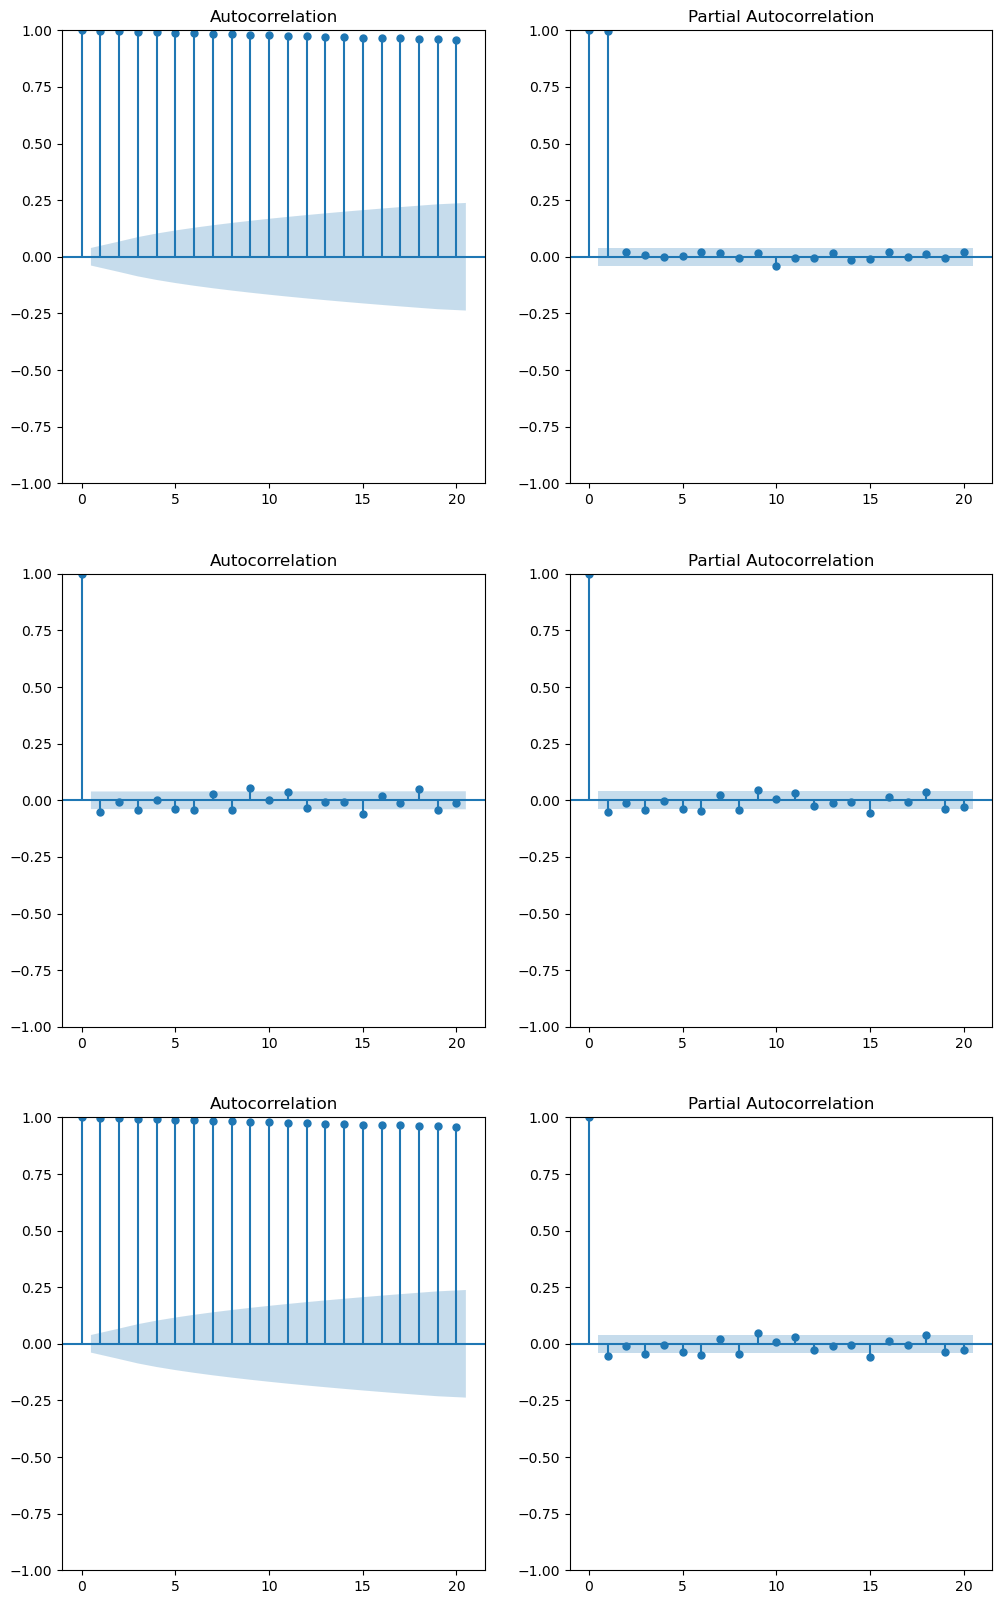

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF, PACF 시각화
fig, ax = plt.subplots(3, 2, figsize=(12, 20))

# 원본 (마감장)
plot_acf(google_stock_df, lags=20, ax=ax[0][0])
plot_pacf(google_stock_df, lags=20, ax=ax[0][1])

# 차분 후
plot_acf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][1])

# 원본의 ACF와 차분 후의 PACF
# 추세 변동 시계열(비정상 데이터)이였던 원본 데이터를
# 차분을 거침으로써 정상 시계열로 만들었다는 것을 보여준다
plot_acf(google_stock_df, lags=20, ax=ax[2][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[2][1])
plt.show()

In [4]:
import yfinance as yf

google_stock_df = yf.download('GOOG', start='2014-05-01')

google_stock_df = google_stock_df['Adj Close']
google_stock_df

[*********************100%%**********************]  1 of 1 completed


Date
2014-05-01     26.464643
2014-05-02     26.294304
2014-05-05     26.288328
2014-05-06     25.657280
2014-05-07     25.399282
                 ...    
2024-06-05    176.868744
2024-06-06    178.147278
2024-06-07    175.750000
2024-06-10    176.630005
2024-06-11    178.190002
Name: Adj Close, Length: 2546, dtype: float64

In [5]:
google_stock_diff_df = google_stock_df.diff()
google_stock_diff_df.dropna(inplace=True)

google_stock_diff_df

Date
2014-05-02   -0.170340
2014-05-05   -0.005976
2014-05-06   -0.631048
2014-05-07   -0.257998
2014-05-08    0.051800
                ...   
2024-06-05    1.937805
2024-06-06    1.278534
2024-06-07   -2.397278
2024-06-10    0.880005
2024-06-11    1.559998
Name: Adj Close, Length: 2545, dtype: float64

In [6]:
WINDOW_SIZE = 20

# 차분 전후의 데이터 그래프를 부드럽게 변경
# WINDOW_SIZE가 커질수록 일직선에 더욱 가까워진다
moving_avg = google_stock_df.rolling(WINDOW_SIZE).mean()
moving_diff_avg = google_stock_diff_df.rolling(WINDOW_SIZE).mean()

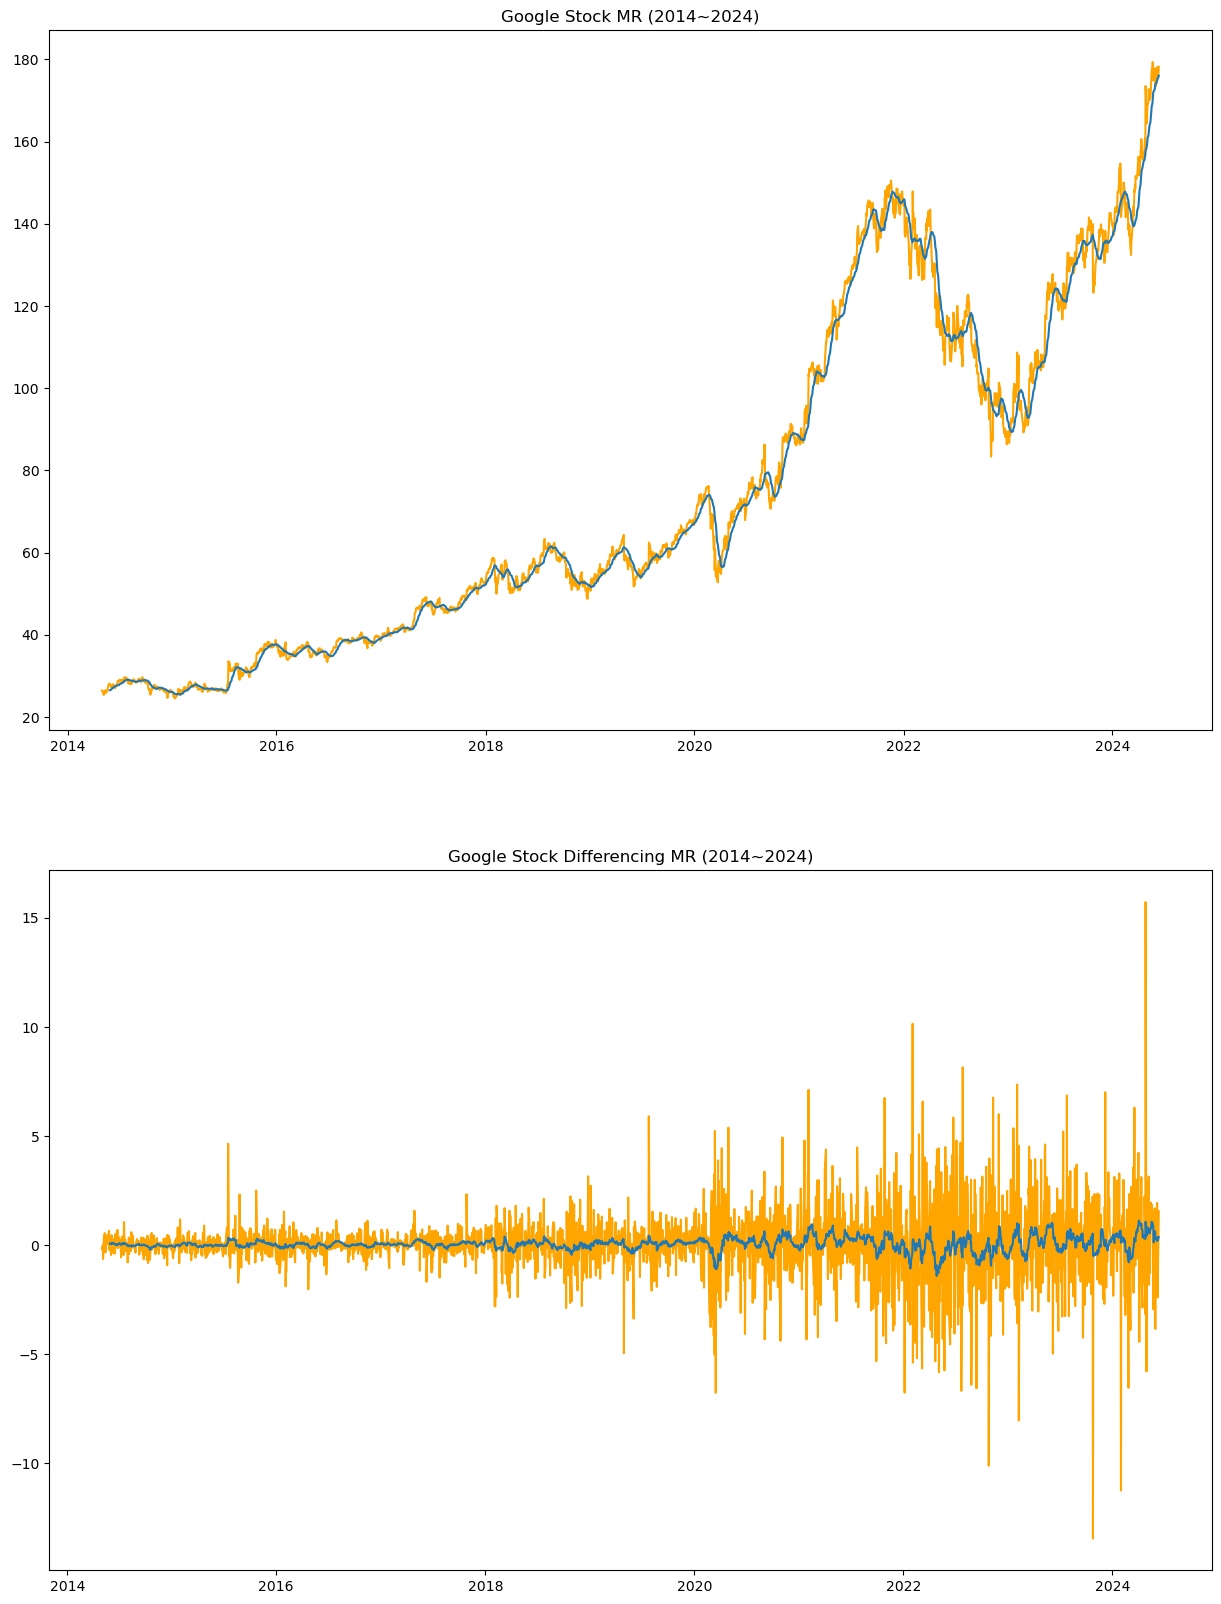

In [7]:
import matplotlib.pyplot as plt

# 차분 전후, rooling 전후의 그래프 시각화
plt.figure(figsize=(15, 20))

# 차분 및 rolling 전
plt.subplot(211)
plt.plot(google_stock_df, c='orange')

# 차분 전, rolling 후
plt.subplot(211)
plt.plot(moving_avg)
plt.title('Google Stock MR (2014~2024)')

# 차분 후, rolling 전
plt.subplot(212)
plt.plot(google_stock_diff_df, c='orange')

# 차분 및 rolling 후
plt.subplot(212)
plt.plot(moving_diff_avg)
plt.title('Google Stock Differencing MR (2014~2024)')

plt.show()

#### ARIMA

In [8]:
google_stock_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2546 entries, 2014-05-01 to 2024-06-11
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
2546 non-null   float64
dtypes: float64(1)
memory usage: 39.8 KB


In [9]:
import pandas as pd

# # 아래 작업을 통해 인덱스를 datetime 형식으로 바꿀 수 있다
# # date_range(시작, 끝): 시작 ~ 끝까지의 날짜. 끝 인덱스도 포함
# google_stock_df = google_stock_df.reindex(pd.date_range(google_stock_df.index[0], google_stock_df.index[-1]))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


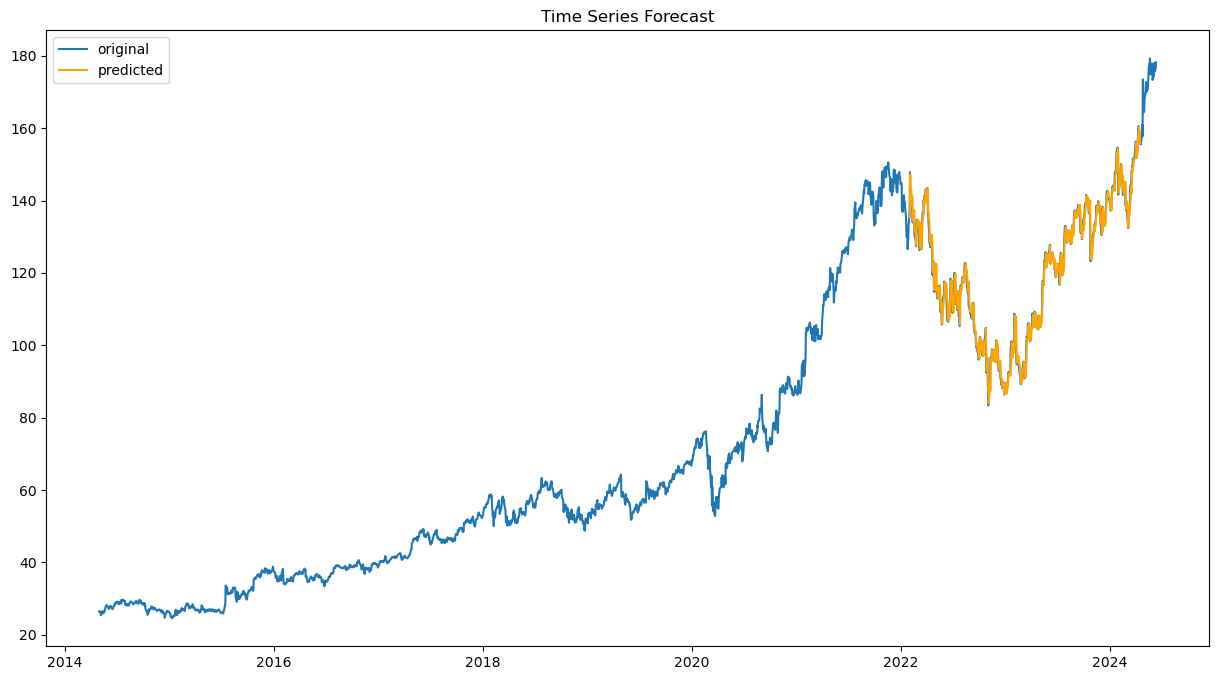

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(데이터, order=(AR, 차분, MA))
model = ARIMA(google_stock_df, order=(1, 1, 1))

# ARIMA 모델은 fit 한 결과를 반드시 변수에 저장할 것!
model_fit = model.fit()

# 시작, 끝 날짜 지정
# 해당 범위 내 데이터만 예측
start_index = pd.to_datetime('2022-02-01')
end_index = pd.to_datetime('2024-04-17')

# fit한 모델 객체로 바로 predict
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(google_stock_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np

# 평균 제곱 오차
mse = mean_squared_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print('Mean Squared Error:', mse)

# 평균 제곱 로그 오차
msle = mean_squared_log_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print('Mean Squared Log Error:', msle)

Mean Squared Error: 6.3747836994791065
Mean Squared Log Error: 0.00045601968822751713
